In [1]:
import pandas as pd
import matplotlib.pyplot as plt


dados = pd.read_csv("C:\\Users\msdof\\Downloads\\projeto parte 1 visualizacao dados\\BRA.csv")

# Renomeando as colunas
dados.rename(columns={'Season': 'temporada',
                      'Date': 'Data',
                    'Home': 'mandante', 
                    'Away': 'visitante', 
                    'HG': 'gols do mandante', 
                    'AG': 'gols do visitante',
                    'PSCH': 'odd do mandante',
                    'PSCA': 'odd do visitante',
                    'PSCD': 'odd do empate',
                    'Res': 'resultado'}, inplace=True)

# Filtrar os dados para a temporada de 2023
temporada_2023 = dados[dados['temporada'] == 2023]
temporada_2023

# Filtrando as colunas desejadas
df = temporada_2023.loc[:, ['Data','mandante', 'visitante', 'gols do mandante', 'gols do visitante', 'resultado', 'odd do mandante', 'odd do visitante', 'odd do empate']]
df

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\msdof\AppData\Local\Temp\ipykernel_21964\4292532189.py:5: SyntaxWarning: invalid escape sequence '\m'
  dados = pd.read_csv("C:\\Users\msdof\\Downloads\\projeto parte 1 visualizacao dados\\BRA.csv")


,Data,mandante,visitante,gols do mandante,gols do visitante,resultado,odd do mandante,odd do visitante,odd do empate
4180,15/04/2023,America MG,Fluminense,0.0,3.0,A,2.55,2.98,3.34
4181,15/04/2023,Palmeiras,Cuiaba,2.0,1.0,H,1.39,8.51,5.12
4182,15/04/2023,Athletico-PR,Goias,2.0,0.0,H,1.64,6.64,3.69
4183,15/04/2023,Botafogo RJ,Sao Paulo,2.0,1.0,H,2.46,3.26,3.17
4184,15/04/2023,Bragantino,Bahia,2.0,1.0,H,1.85,4.58,3.71
...,...,...,...,...,...,...,...,...,...
4555,07/12/2023,Fluminense,Gremio,2.0,3.0,A,2.08,3.35,3.92
4556,07/12/2023,Internacional,Botafogo RJ,3.0,1.0,H,2.10,3.71,3.38
4557,07/12/2023,Santos,Fortaleza,1.0,2.0,A,1.95,4.50,3.33
4558,07/12/2023,Sao Paulo,Flamengo RJ,1.0,0.0,H,3.41,2.26,3.36


In [3]:

# Filtrando jogos em que o mandante venceu
mandante_vitorias = df[df['resultado'] == 'H']

# Calculando a probabilidade
probabilidade_mandante_vencer = len(mandante_vitorias) / len(df)

# Exibindo o resultado
print(f"A probabilidade do mandante vencer é: {probabilidade_mandante_vencer:.2%}")

A probabilidade do mandante vencer é: 46.84%


In [8]:
# Convertendo odds do mandante em probabilidades
df['probabilidade_mandante'] = 1 / df['odd do mandante'] * 100

# Calculando a probabilidade média do mandante vencer baseada nas odds
probabilidade_media_mandante = df['probabilidade_mandante'].mean()

# Exibindo o resultado
print(f"A probabilidade média pela odds do mandante vencer é: {probabilidade_media_mandante:.2f}%")

A probabilidade média pela odds do mandante vencer é: 48.29%


In [11]:
# Filtrando jogos em que o mandante venceu
visitante_vitorias = df[df['resultado'] == 'A']

# Calculando a probabilidade
probabilidade_visitante_vencer = len(visitante_vitorias) / len(df)

# Exibindo o resultado
print(f"A probabilidade do visitante vencer é: {probabilidade_visitante_vencer:.2%}")

A probabilidade do visitante vencer é: 27.37%


In [12]:
# Convertendo odds do visitante em probabilidades
df['probabilidade_visitante'] = 1 / df['odd do visitante'] * 100

# Calculando a probabilidade média do visitante vencer baseada nas odds
probabilidade_media_visitante = df['probabilidade_visitante'].mean()

# Exibindo o resultado
print(f"A probabilidade média pela odds do visitante vencer é: {probabilidade_media_visitante:.2f}%")

A probabilidade média pela odds do visitante vencer é: 26.21%


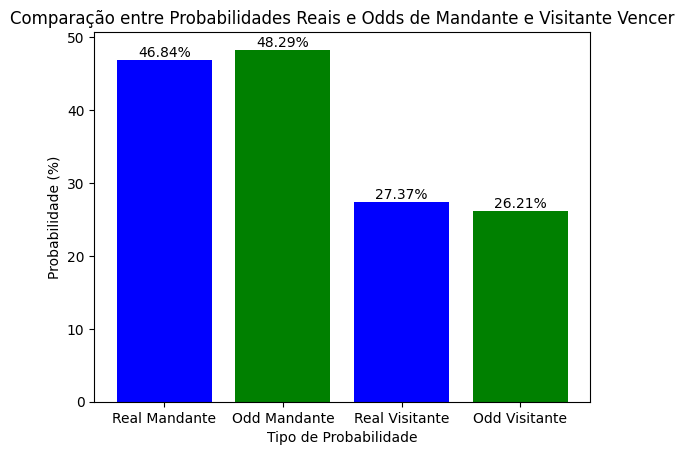

In [16]:
# Filtrando jogos em que o mandante venceu
mandante_vitorias = df[df['resultado'] == 'H']

# Calculando a probabilidade real do mandante vencer
probabilidade_mandante_vencer = len(mandante_vitorias) / len(df) * 100

# Convertendo odds do mandante em probabilidades implícitas
df['probabilidade_mandante'] = 1 / df['odd do mandante'] * 100

# Calculando a probabilidade média implícita do mandante vencer baseada nas odds
probabilidade_media_mandante = df['probabilidade_mandante'].mean()

# Filtrando jogos em que o visitante venceu
visitante_vitorias = df[df['resultado'] == 'A']

# Calculando a probabilidade real do visitante vencer
probabilidade_visitante_vencer = len(visitante_vitorias) / len(df) * 100

# Convertendo odds do visitante em probabilidades implícitas
df['probabilidade_visitante'] = 1 / df['odd do visitante'] * 100

# Calculando a probabilidade média implícita do visitante vencer baseada nas odds
probabilidade_media_visitante = df['probabilidade_visitante'].mean()

# Criando DataFrame com as probabilidades
data = {
    'Tipo': ['Real Mandante', 'Odd Mandante', 'Real Visitante', 'Odd Visitante'],
    'Probabilidade': [probabilidade_mandante_vencer, probabilidade_media_mandante, probabilidade_visitante_vencer, probabilidade_media_visitante]
}

df_probabilidades = pd.DataFrame(data)

# Gerando o gráfico de barras
fig, ax = plt.subplots()
bars = ax.bar(df_probabilidades['Tipo'], df_probabilidades['Probabilidade'], color=['blue', 'green', 'blue', 'green'])

# Adicionando rótulos e título
ax.set_xlabel('Tipo de Probabilidade')
ax.set_ylabel('Probabilidade (%)')
ax.set_title('Comparação entre Probabilidades Reais e Odds de Mandante e Visitante Vencer')

# Adicionando os valores acima das barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%", ha='center', va='bottom')

plt.show()